# IFT 4030 / 7030, Machine Learning for Signal Processing Lab 1

In this lab we will cover material from lecture 1. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn.

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.


-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 1. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris.

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.


# Question 1, The Dot Product (Le produit scalaire) -- 20 pt

In week 1, slide 32, we have seen the dot product. We'll now see it in action.

Using pytorch, define two vectors a=(1,1), b=(0,1). Then calculate the angle between the two vectors. Return the result in angles. (Not in radians please)

Hint: use torch.tensor to define the tensors and torch.arccos( ) is the arccosine function

--------------------------

Au cours de la semaine 1, diapositive 32, nous avons vu le produit scalaire. Nous allons maintenant le voir en action.

À l'aide de pytorch, définissez deux vecteurs a=(1,1), b=(0,1). Calculez ensuite l'angle entre les deux vecteurs. Renvoie le résultat en angles. (Pas en radians s'il vous plaît)

Astuce : utilisez torch.tensor pour définir les tenseurs et torch.arccos() est la fonction arccosinus



In [94]:
import torch

# Solution

# Define the vectors
a = torch.tensor([1, 1]).float()
b = torch.tensor([0, 1]).float()

# Convert the angle to degrees
angle_degrees = torch.arccos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b))) * (180 / torch.pi)

angle_degrees

tensor(45.)

# Question 2, Manipulating Data - 40 pt

## Q2.A Input and visualize (10pt)

In this question we will first download a picture of our beloved Star Trek TNG Character Data https://en.wikipedia.org/wiki/Data_(Star_Trek). And then we will print it, and downsample it.

Hint: Use `torchvision.io.read_image()` to load then use `plt.imshow(data, cmap='gray')` to show the image.  

----------------

Dans cette question, nous allons d'abord télécharger une photo de nos bien-aimées données de personnages Star Trek TNG https://en.wikipedia.org/wiki/Data_(Star_Trek). Et puis nous l’imprimerons et le sous-échantillonnerons.

Astuce : utilisez `torchvision.io.read_image()` pour charger, puis utilisez `plt.imshow(data, cmap='gray')` pour afficher l'image.




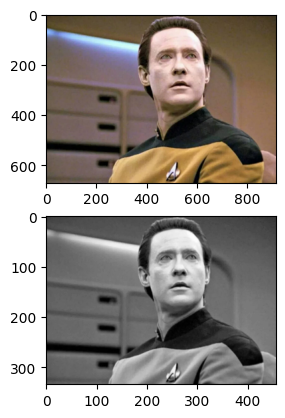

In [95]:
# Download Data
#!wget https://sourceseparationresearch.com/static/mlsp_data/data.png
import matplotlib.pyplot as plt
import torchvision

# Visualize data now, let's see what data looks like. first load visualize using torchvision.io.read_image() (10pt)
# Visualisez les données maintenant, voyons à quoi ressemblent les données. premier chargement de la visualisation en utilisant plt.torchvision.io.read_image() (5pt)

data = torchvision.io.read_image('data.png')

# get the shape of the data
# obtenir la forme des données

shape = data.shape

# now show the color image. Note that plt.imshow requires the dimension format H x W x nchannels Hint: You can use .permute() to swap dimensions
# affiche maintenant l'image en couleur. Notez que plt.imshow nécessite le format de dimension H x L x nchannels. Astuce : vous pouvez utiliser .permute() pour échanger les dimensions.
plt.subplot(2, 1, 1)
plt.imshow(data.permute(1, 2, 0), cmap='gray')

# Make Data Gray Scale and Low-Res (same as what we have in slide 36-week1)
# Créez des données en échelle de gris et en basse résolution (identique à ce que nous avons dans la diapositive 36-semaine 1)
data_gray = torchvision.transforms.functional.rgb_to_grayscale(data)
data_low_res = torchvision.transforms.functional.resize(data_gray, (shape[1] // 2, shape[2] // 2))
plt.subplot(2, 1, 2)
plt.imshow(data_low_res.squeeze(), cmap='gray')

# Methode du professeur


# data_gray = data.float().mean(dim=0, keepdim=True)
# data_low_res = data_gray.permute(1,2,0)[::20,::20,:].permute(2,0,1)
# print(data_low_res.shape)
# plt.subplot(2, 1, 2)
# plt.imshow(data_low_res.permute(1,2,0), cmap='gray')




## Q2.B The head replicator matrix (20pt)

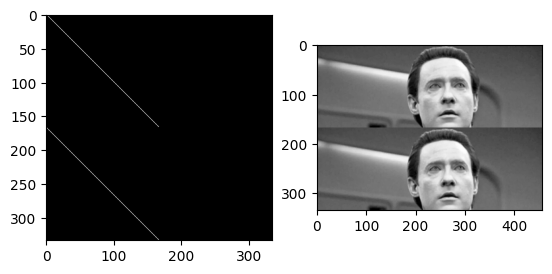

In [96]:
# now let's replicate data's head, that is, get the example on the second row, first column of slide 36.
# Essentially I am asking you to reproduce what I had in slide 36 (second row, first column)

##############

# La matrice du réplicateur de tête (20 pt)
# Maintenant, répliquons la tête des données, c'est-à-dire prenons l'exemple sur la deuxième ligne, première colonne de la diapositive 36.
# Essentiellement, je vous demande de reproduire ce que j'avais dans la diapositive 36 (deuxième ligne, première colonne)

# replicated_data = torch.cat([data_low_res[:,:data_low_res.shape[1]//2,:], data_low_res[:,:data_low_res.shape[1]//2,:]], dim=1)

# define the eye mat
heigth = data_low_res.shape[1]
eye_mat = torch.eye(heigth)

# get the head replicator matrix
# obtenez la matrice de replicateur de la tete
eye_mat[heigth//2:,:] = eye_mat[:heigth//2,:]
head_replicator_mat = eye_mat

replicated_data = torch.matmul(head_replicator_mat.float(),data_low_res.float())
# show the results
# montrez nous le résultat
plt.subplot(1, 2, 1)
plt.imshow(head_replicator_mat, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(replicated_data.permute(1,2,0), cmap='gray')

## Q2.C Measure of an android: How similar is this image to the originaldata?(10pt)

https://en.wikipedia.org/wiki/The_Measure_of_a_Man_(Star_Trek:_The_Next_Generation)

In [97]:
import torch

# Measure of an android: How similar is this image to the original data? (10pt)
# In this question we will calculate the angle (again in degrees) between the original downsampled data image, and this one.
# Hint: Use the cosine similarity. Hint2: You don't have to vectorize.

##################

# Mesure d'un androïde : dans quelle mesure cette image est-elle similaire aux données originales ? (10pts)
# Dans cette question, nous calculerons l'angle (toujours en degrés) entre l'image de données originale sous-échantillonnée et celle-ci.
# Astuce : utilisez la similarité cosinus. Astuce 2 : vous n'êtes pas obligé de vectoriser

cos_similarity = torch.nn.functional.cosine_similarity(data_low_res.flatten().float(), replicated_data.flatten().float(),dim=0)

angle_radians = torch.arccos(cos_similarity)

angle_degrees = torch.rad2deg(torch.acos(cos_similarity))

angle_degrees



tensor(23.0251)

# Question 3: Einstein Meets Data (40 pt)

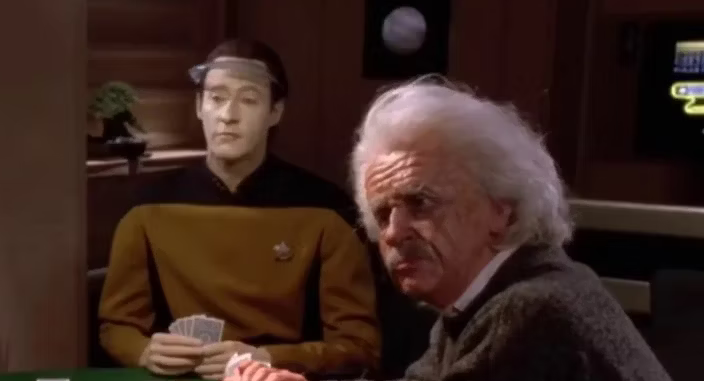

In this question we will create a specific transformation tensor for a color image. And then we will apply it on our color image using a tensor product. We will use the Einstein notation to define the transformation.

Hint: Use `torch.einsum()`

-------------------

Dans cette question, nous allons créer un tenseur de transformation spécifique pour une image couleur. Et puis nous l'appliquerons sur notre image couleur à l'aide d'un produit tenseur. Nous utiliserons la notation d'Einstein pour définir la transformation.

Astuce : utilisez `torch.einsum()`

## Q3.A The transformation tensor (20pt)

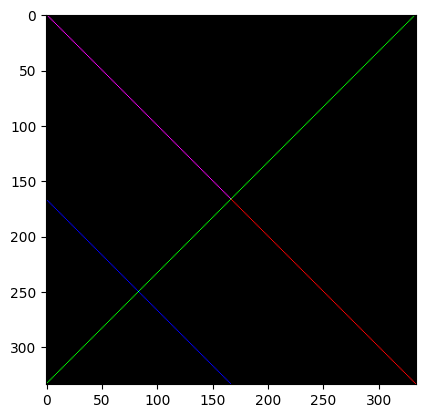

In [98]:
# Let's create the transformation tensor. (20pt)
# We want to have a tensor with shape H x H X C, where H is the height of the original low-res data image, and C=3, since we have an RGB image.

# For the red channel, use an identity matrix.
# For the green channel, use the matrix that turns the data upside down
# For the blue channel, use the head replicator matrix (the matrix we used just before)

# After getting this matrix don't

# Hint you can use torch.stack(list_of_matrices,dim=2) to get the transform matrix

#################################

# Créons le tenseur de transformation. (20pts)
# Nous voulons avoir un tenseur de forme H x H X C, où H est la hauteur de l'image de données basse résolution d'origine, et C=3, puisque nous avons une image RVB.

# Pour le canal rouge, utilisez une matrice d'identité.
# Pour le canal vert, utilisez la matrice qui retourne les données
# Pour le canal bleu, utilisez la matrice du réplicateur de tête (la matrice que nous avons utilisée juste avant)

# Après avoir obtenu cette matrice, ne le faites pas

# Astuce, vous pouvez utiliser torch.stack(list_of_matrices,dim=2) pour obtenir la matrice de transformation


resized_data = torchvision.transforms.functional.resize(data_low_res, (data_low_res.shape[1], data_low_res.shape[1])).permute(1, 2, 0)

red_canal_matrix = torch.eye(data_low_res.shape[1])
green_canal_matrix = torch.flip(torch.eye(data_low_res.shape[1]), [0])
blue_canal_matrix = head_replicator_mat


transform_matrix = torch.stack([red_canal_matrix, green_canal_matrix, blue_canal_matrix], dim=2)
plt.imshow(transform_matrix)


## Q3.B Data Manipulation (in a good way) (20pt)

torch.Size([3, 334, 457])


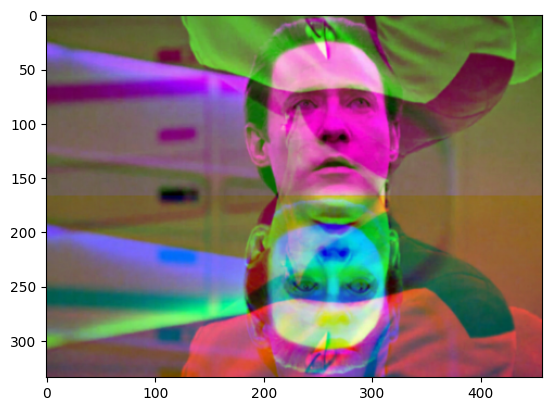

In [103]:
# Now, let's manipulate the data with a tensor operation (20pt).

# We basically want you to multiply each channel separately with its own transform matrix.

# Here's the operation we want  TFMat_{i k c} Image_{k j c} --> Result_{i j c} (Note that this is essentially a batch matrix multiply)
# After the multiplication visualize the multiplication. But do not forget to get the pixel range to [0, 1] since we have floating point numbers

#######################################

# Maintenant, manipulons les données avec une opération tensorielle (20pt).

# Nous voulons essentiellement que vous multipliiez chaque canal séparément avec sa propre matrice de transformation.

# Voici l'opération que nous voulons TFMat_{i k c} Image_{k j c} --> Result_{i j c} (Notez qu'il s'agit essentiellement d'une multiplication matricielle par lots)
# Après la multiplication, visualisez la multiplication. Mais n'oubliez pas d'amener la plage de pixels à [0, 1] puisque nous avons des nombres à virgule flottante

data_low_res = torchvision.transforms.functional.resize(data, (shape[1] // 2, shape[2] // 2))
# data_low_res = data.permute(1, 2, 0)[::20,::20,:].float()
print(data_low_res.shape)
result = torch.einsum('ikc,kjc->ijc', transform_matrix, data_low_res.permute(1,2,0).float())
result = result/result.max()

plt.imshow(result)


## Bonus

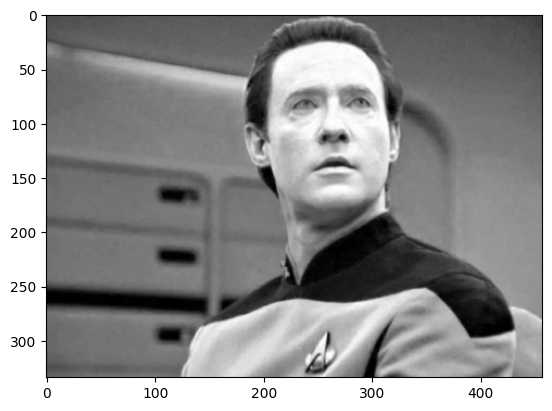

In [102]:
# Bonus: Filter out data from this mess (20 pt)

# Bonus : sauvez data de ce désordre (20 pt)

plt.imshow(result[:,:,0], cmap='gray')